# Covid 19 X-ray chest classifier - Xception net based

3 classes 
<ol>
<li>Normal</li>
<li>Covid19</li>
<li>Other Virus </li>
</ol>

Reference: 
<a href="https://arxiv.org/abs/1610.02357" >Xception: Deep Learning with Depthwise Separable Convolutions (CVPR 2017)</a>



In [1]:

import tensorflow
from PIL import Image
import glob

from tensorflow.keras.optimizers import Adam,SGD,RMSprop,Adamax
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam,Adadelta,RMSprop,Adagrad
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Conv2D, SeparableConv2D, MaxPool2D, LeakyReLU, Activation
#from tensorflow.keras.applications.imagenet_utils import preprocess_input
import numpy as np
import argparse
import cv2

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

from tensorflow.keras.models import Model, Sequential
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
import scipy
import skimage
from skimage.transform import resize
import random
import os
for dirname, _, filenames in os.walk('./train'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/home/rjpg/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/rjpg/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/rjpg/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/rjpg/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:5

./train/NORMAL/NORMAL2-IM-1027-0001.jpeg
./train/NORMAL/NORMAL2-IM-0402-0001.jpeg
./train/NORMAL/IM-0546-0001.jpeg
./train/NORMAL/IM-0667-0001.jpeg
./train/NORMAL/NORMAL2-IM-0041-0001.jpeg
./train/NORMAL/NORMAL2-IM-1089-0001.jpeg
./train/NORMAL/NORMAL2-IM-1154-0001.jpeg
./train/NORMAL/IM-0189-0001.jpeg
./train/NORMAL/IM-0568-0001.jpeg
./train/NORMAL/NORMAL2-IM-0847-0001.jpeg
./train/NORMAL/IM-0265-0001.jpeg
./train/NORMAL/NORMAL2-IM-0601-0001.jpeg
./train/NORMAL/NORMAL2-IM-0439-0001.jpeg
./train/NORMAL/NORMAL2-IM-0300-0001.jpeg
./train/NORMAL/NORMAL2-IM-0462-0001.jpeg
./train/NORMAL/IM-0525-0001.jpeg
./train/NORMAL/IM-0156-0001.jpeg
./train/NORMAL/NORMAL2-IM-1182-0001.jpeg
./train/NORMAL/NORMAL2-IM-0496-0001.jpeg
./train/NORMAL/IM-0381-0001.jpeg
./train/NORMAL/NORMAL2-IM-0980-0001.jpeg
./train/NORMAL/IM-0632-0001.jpeg
./train/NORMAL/NORMAL2-IM-0934-0001.jpeg
./train/NORMAL/IM-0061-0001.jpeg
./train/NORMAL/NORMAL2-IM-1196-0001.jpeg
./train/NORMAL/IM-0011-0001-0001.jpeg
./train/NORMAL/IM

./train/COVID/000012-1.jpg
./train/COVID/000002-6.jpg
./train/COVID/8FDE8DBA-CFBD-4B4C-B1A4-6F36A93B7E87.jpeg
./train/COVID/BMJ-37-163-g1.jpg
./train/COVID/yxppt-2020-02-19_00-51-27_287214-day8.jpg
./train/COVID/19abe1f3.jpg
./train/COVID/41379_2020_536_Fig2_HTML-c1.png
./train/COVID/AR-2.jpg
./train/COVID/1-s2.0-S1684118220300682-main.pdf-002-a1.png
./train/COVID/2eadbbb367a0366d8c34350d083a83_jumbo.jpeg
./train/COVID/887db78f.jpg
./train/COVID/nejmc2001573_f1b.jpeg
./train/COVID/covid-19-pneumonia-41-day-0.jpg
./train/COVID/ansu-publish-ahead-of-print-10.1097.sla.0000000000003955-g001-f.png
./train/COVID/SARS-10.1148rg.242035193-g04mr34g04b-Fig4b-day12.jpeg
./train/COVID/1-s2.0-S0929664620300449-gr2_lrg-d.jpg
./train/COVID/000005-5-b.jpg
./train/COVID/covid-19-pneumonia-22-day2-pa.png
./train/COVID/08ed451c576ee00935ee178ec85c57_jumbo-1.jpeg
./train/COVID/lancet-case2a.jpg
./train/COVID/1-s2.0-S1521661620303314-gr1_lrg-b.png
./train/COVID/16646_1_1.jpg
./train/COVID/cb706009.jpg
./tr

In [2]:


COV_DIR = "./train/COVID/"
NORM_DIR = "./train/NORMAL/"
VIR_DIR = "./train/PNEUMONIA/"
Pimages = os.listdir(COV_DIR)
Nimages = os.listdir(NORM_DIR)
Vimages = os.listdir(VIR_DIR)

In [6]:
def Images_details_Print_data(data, path):
    print(" ====== Images in: ", path)    
    for k, v in data.items():
        print("%s:\t%s" % (k, v))

def Images_details(path):
    files = [f for f in glob.glob(path + "**/*.*", recursive=True)]
    data = {}
    data['images_count'] = len(files)
    data['min_width'] = 10**100  # No image will be bigger than that
    data['max_width'] = 0
    data['min_height'] = 10**100  # No image will be bigger than that
    data['max_height'] = 0


    for f in files:
        im = Image.open(f)
        width, height = im.size
        data['min_width'] = min(width, data['min_width'])
        data['max_width'] = max(width, data['max_height'])
        data['min_height'] = min(height, data['min_height'])
        data['max_height'] = max(height, data['max_height'])

    Images_details_Print_data(data, path)

In [7]:
Images_details(COV_DIR)


 ====== Images in:  ./train/COVID/
images_count:	755
min_width:	157
max_width:	4757
min_height:	156
max_height:	4757


In [35]:
data=[]
labels=[]
Uninfected=os.listdir(NORM_DIR)
for a in Uninfected:
	# extract the class label from the filename
	

	# load the image, swap color channels, and resize it to be a fixed
	# 224x224 pixels while ignoring aspect ratio
	image = cv2.imread(NORM_DIR+a)
	print(NORM_DIR+a)
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	image = cv2.resize(image, (224, 224))

	# update the data and labels lists, respectively
	data.append(image)
	labels.append(0)

Covid=os.listdir(COV_DIR)
for b in Covid:
	# extract the class label from the filename
	

	# load the image, swap color channels, and resize it to be a fixed
	# 224x224 pixels while ignoring aspect ratio
	image = cv2.imread(COV_DIR+b)
	print(COV_DIR+b)
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	image = cv2.resize(image, (224, 224))

	# update the data and labels lists, respectively
	data.append(image)
	labels.append(1)
 
Virus=os.listdir(VIR_DIR)
for c in Virus:
	# extract the class label from the filename
	

	# load the image, swap color channels, and resize it to be a fixed
	# 224x224 pixels while ignoring aspect ratio
	image = cv2.imread(VIR_DIR+c)
	print(VIR_DIR+c)
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	image = cv2.resize(image, (224, 224))

	# update the data and labels lists, respectively
	data.append(image)
	labels.append(2)

./train/NORMAL/NORMAL2-IM-1027-0001.jpeg
./train/NORMAL/NORMAL2-IM-0402-0001.jpeg
./train/NORMAL/IM-0546-0001.jpeg
./train/NORMAL/IM-0667-0001.jpeg
./train/NORMAL/NORMAL2-IM-0041-0001.jpeg
./train/NORMAL/NORMAL2-IM-1089-0001.jpeg
./train/NORMAL/NORMAL2-IM-1154-0001.jpeg
./train/NORMAL/IM-0189-0001.jpeg
./train/NORMAL/IM-0568-0001.jpeg
./train/NORMAL/NORMAL2-IM-0847-0001.jpeg
./train/NORMAL/IM-0265-0001.jpeg
./train/NORMAL/NORMAL2-IM-0601-0001.jpeg
./train/NORMAL/NORMAL2-IM-0439-0001.jpeg
./train/NORMAL/NORMAL2-IM-0300-0001.jpeg
./train/NORMAL/NORMAL2-IM-0462-0001.jpeg
./train/NORMAL/IM-0525-0001.jpeg
./train/NORMAL/IM-0156-0001.jpeg
./train/NORMAL/NORMAL2-IM-1182-0001.jpeg
./train/NORMAL/NORMAL2-IM-0496-0001.jpeg
./train/NORMAL/IM-0381-0001.jpeg
./train/NORMAL/NORMAL2-IM-0980-0001.jpeg
./train/NORMAL/IM-0632-0001.jpeg
./train/NORMAL/NORMAL2-IM-0934-0001.jpeg
./train/NORMAL/IM-0061-0001.jpeg
./train/NORMAL/NORMAL2-IM-1196-0001.jpeg
./train/NORMAL/IM-0011-0001-0001.jpeg
./train/NORMAL/IM

./train/NORMAL/NORMAL2-IM-1327-0001.jpeg
./train/NORMAL/NORMAL2-IM-0832-0001.jpeg
./train/NORMAL/NORMAL2-IM-0362-0001.jpeg
./train/NORMAL/NORMAL2-IM-0623-0001.jpeg
./train/NORMAL/NORMAL2-IM-0944-0001.jpeg
./train/NORMAL/IM-0515-0001.jpeg
./train/NORMAL/IM-0631-0001.jpeg
./train/NORMAL/NORMAL2-IM-0951-0001.jpeg
./train/NORMAL/NORMAL2-IM-0418-0001.jpeg
./train/NORMAL/IM-0291-0001.jpeg
./train/NORMAL/NORMAL2-IM-0246-0001-0002.jpeg
./train/NORMAL/NORMAL2-IM-1258-0001-0001.jpeg
./train/NORMAL/NORMAL2-IM-1148-0001.jpeg
./train/NORMAL/IM-0442-0001.jpeg
./train/NORMAL/NORMAL2-IM-0566-0001.jpeg
./train/NORMAL/NORMAL2-IM-0666-0001.jpeg
./train/NORMAL/IM-0128-0001.jpeg
./train/NORMAL/IM-0216-0001.jpeg
./train/NORMAL/IM-0631-0001-0001.jpeg
./train/NORMAL/IM-0545-0001.jpeg
./train/NORMAL/NORMAL2-IM-1243-0001.jpeg
./train/NORMAL/NORMAL2-IM-0848-0001.jpeg
./train/NORMAL/IM-0500-0001.jpeg
./train/NORMAL/NORMAL2-IM-0419-0001.jpeg
./train/NORMAL/NORMAL2-IM-0447-0001.jpeg
./train/NORMAL/NORMAL2-IM-0278-0

./train/NORMAL/NORMAL2-IM-1010-0001.jpeg
./train/NORMAL/NORMAL2-IM-1088-0001.jpeg
./train/NORMAL/NORMAL2-IM-0460-0001.jpeg
./train/NORMAL/NORMAL2-IM-0110-0001.jpeg
./train/NORMAL/IM-0523-0001.jpeg
./train/NORMAL/NORMAL2-IM-1168-0001.jpeg
./train/NORMAL/NORMAL2-IM-1126-0001.jpeg
./train/NORMAL/NORMAL2-IM-0361-0001.jpeg
./train/NORMAL/IM-0644-0001-0001.jpeg
./train/NORMAL/NORMAL2-IM-0981-0001.jpeg
./train/NORMAL/IM-0505-0001-0002.jpeg
./train/NORMAL/NORMAL2-IM-1016-0001.jpeg
./train/NORMAL/IM-0650-0001-0001.jpeg
./train/NORMAL/NORMAL2-IM-1303-0001.jpeg
./train/NORMAL/IM-0694-0001.jpeg
./train/NORMAL/NORMAL2-IM-0323-0001.jpeg
./train/NORMAL/NORMAL2-IM-0730-0001.jpeg
./train/NORMAL/IM-0596-0001.jpeg
./train/NORMAL/NORMAL2-IM-0246-0001.jpeg
./train/NORMAL/IM-0009-0001.jpeg
./train/NORMAL/IM-0673-0001.jpeg
./train/NORMAL/NORMAL2-IM-0683-0001.jpeg
./train/NORMAL/IM-0517-0001-0001.jpeg
./train/NORMAL/NORMAL2-IM-1256-0001.jpeg
./train/NORMAL/NORMAL2-IM-1314-0001.jpeg
./train/NORMAL/IM-0607-0001

./train/NORMAL/NORMAL2-IM-1300-0001.jpeg
./train/NORMAL/NORMAL2-IM-0948-0001.jpeg
./train/NORMAL/NORMAL2-IM-0277-0001.jpeg
./train/NORMAL/NORMAL2-IM-1191-0001.jpeg
./train/NORMAL/NORMAL2-IM-0832-0001-0001.jpeg
./train/NORMAL/NORMAL2-IM-0723-0001.jpeg
./train/NORMAL/IM-0714-0001.jpeg
./train/NORMAL/NORMAL2-IM-0280-0001.jpeg
./train/NORMAL/NORMAL2-IM-0173-0001-0002.jpeg
./train/NORMAL/NORMAL2-IM-0370-0001.jpeg
./train/NORMAL/NORMAL2-IM-0630-0001.jpeg
./train/NORMAL/NORMAL2-IM-0961-0001.jpeg
./train/NORMAL/NORMAL2-IM-0818-0001.jpeg
./train/NORMAL/NORMAL2-IM-1323-0001.jpeg
./train/NORMAL/IM-0549-0001.jpeg
./train/NORMAL/NORMAL2-IM-0369-0001.jpeg
./train/NORMAL/IM-0177-0001.jpeg
./train/NORMAL/NORMAL2-IM-1064-0001.jpeg
./train/NORMAL/IM-0363-0001.jpeg
./train/NORMAL/IM-0459-0001.jpeg
./train/NORMAL/IM-0553-0001-0003.jpeg
./train/NORMAL/NORMAL2-IM-0890-0001.jpeg
./train/NORMAL/NORMAL2-IM-0376-0001.jpeg
./train/NORMAL/NORMAL2-IM-1376-0001.jpeg
./train/NORMAL/NORMAL2-IM-0454-0001.jpeg
./train/

./train/NORMAL/NORMAL2-IM-1258-0001.jpeg
./train/NORMAL/NORMAL2-IM-0807-0001.jpeg
./train/NORMAL/NORMAL2-IM-0415-0001.jpeg
./train/NORMAL/IM-0075-0001.jpeg
./train/NORMAL/IM-0299-0001.jpeg
./train/NORMAL/IM-0626-0001-0001.jpeg
./train/NORMAL/NORMAL2-IM-0338-0001.jpeg
./train/NORMAL/NORMAL2-IM-0553-0001.jpeg
./train/NORMAL/IM-0337-0001.jpeg
./train/NORMAL/IM-0458-0001.jpeg
./train/NORMAL/IM-0411-0001.jpeg
./train/NORMAL/NORMAL2-IM-0309-0001.jpeg
./train/NORMAL/NORMAL2-IM-1234-0001.jpeg
./train/NORMAL/IM-0282-0001.jpeg
./train/NORMAL/NORMAL2-IM-0531-0001.jpeg
./train/NORMAL/IM-0622-0001.jpeg
./train/NORMAL/NORMAL2-IM-0385-0001.jpeg
./train/NORMAL/NORMAL2-IM-0780-0001.jpeg
./train/NORMAL/NORMAL2-IM-0829-0001.jpeg
./train/NORMAL/NORMAL2-IM-0806-0001.jpeg
./train/NORMAL/NORMAL2-IM-0535-0001-0002.jpeg
./train/NORMAL/NORMAL2-IM-0416-0001.jpeg
./train/NORMAL/NORMAL2-IM-0640-0001.jpeg
./train/NORMAL/IM-0504-0001.jpeg
./train/NORMAL/NORMAL2-IM-0669-0001.jpeg
./train/NORMAL/NORMAL2-IM-0931-0001.j

./train/NORMAL/NORMAL2-IM-0289-0001.jpeg
./train/NORMAL/NORMAL2-IM-0875-0001.jpeg
./train/NORMAL/IM-0343-0001.jpeg
./train/NORMAL/NORMAL2-IM-0051-0001.jpeg
./train/NORMAL/IM-0319-0001.jpeg
./train/NORMAL/NORMAL2-IM-0838-0001.jpeg
./train/NORMAL/IM-0674-0001.jpeg
./train/NORMAL/IM-0496-0001.jpeg
./train/NORMAL/IM-0001-0001.jpeg
./train/NORMAL/IM-0730-0001.jpeg
./train/NORMAL/IM-0028-0001.jpeg
./train/NORMAL/IM-0635-0001.jpeg
./train/NORMAL/NORMAL2-IM-0441-0001.jpeg
./train/NORMAL/NORMAL2-IM-1294-0001-0001.jpeg
./train/NORMAL/NORMAL2-IM-1174-0001.jpeg
./train/NORMAL/IM-0753-0001.jpeg
./train/NORMAL/NORMAL2-IM-0617-0001.jpeg
./train/NORMAL/IM-0724-0001.jpeg
./train/NORMAL/NORMAL2-IM-0221-0001.jpeg
./train/NORMAL/NORMAL2-IM-1117-0001.jpeg
./train/NORMAL/NORMAL2-IM-0339-0001.jpeg
./train/NORMAL/NORMAL2-IM-1220-0001.jpeg
./train/NORMAL/IM-0650-0001-0002.jpeg
./train/NORMAL/NORMAL2-IM-0950-0001.jpeg
./train/NORMAL/IM-0152-0001.jpeg
./train/NORMAL/NORMAL2-IM-0507-0001.jpeg
./train/NORMAL/NORMA

./train/NORMAL/IM-0733-0001.jpeg
./train/NORMAL/NORMAL2-IM-0671-0001.jpeg
./train/NORMAL/IM-0276-0001.jpeg
./train/NORMAL/IM-0539-0001-0002.jpeg
./train/NORMAL/IM-0084-0001.jpeg
./train/NORMAL/NORMAL2-IM-0896-0001.jpeg
./train/NORMAL/NORMAL2-IM-1412-0001.jpeg
./train/NORMAL/IM-0429-0001-0002.jpeg
./train/NORMAL/IM-0564-0001.jpeg
./train/NORMAL/IM-0280-0001.jpeg
./train/NORMAL/IM-0696-0001.jpeg
./train/NORMAL/NORMAL2-IM-0790-0001.jpeg
./train/NORMAL/IM-0542-0001.jpeg
./train/NORMAL/NORMAL2-IM-0812-0001.jpeg
./train/NORMAL/IM-0428-0001.jpeg
./train/NORMAL/IM-0228-0001.jpeg
./train/NORMAL/NORMAL2-IM-0577-0001.jpeg
./train/NORMAL/NORMAL2-IM-1142-0001-0001.jpeg
./train/NORMAL/NORMAL2-IM-0672-0001.jpeg
./train/NORMAL/NORMAL2-IM-0567-0001.jpeg
./train/NORMAL/NORMAL2-IM-0120-0001.jpeg
./train/NORMAL/NORMAL2-IM-0888-0001.jpeg
./train/NORMAL/NORMAL2-IM-1093-0001.jpeg
./train/NORMAL/NORMAL2-IM-0879-0001.jpeg
./train/NORMAL/NORMAL2-IM-1203-0001.jpeg
./train/NORMAL/NORMAL2-IM-1336-0001.jpeg
./train

./train/NORMAL/NORMAL2-IM-0555-0001-0001.jpeg
./train/NORMAL/IM-0736-0001.jpeg
./train/NORMAL/NORMAL2-IM-0238-0001.jpeg
./train/NORMAL/NORMAL2-IM-0919-0001.jpeg
./train/NORMAL/NORMAL2-IM-1123-0001.jpeg
./train/NORMAL/NORMAL2-IM-0256-0001.jpeg
./train/NORMAL/IM-0356-0001.jpeg
./train/NORMAL/IM-0492-0001.jpeg
./train/NORMAL/NORMAL2-IM-0399-0001.jpeg
./train/NORMAL/NORMAL2-IM-0690-0001.jpeg
./train/NORMAL/NORMAL2-IM-0316-0001.jpeg
./train/NORMAL/NORMAL2-IM-1362-0001.jpeg
./train/NORMAL/NORMAL2-IM-0210-0001.jpeg
./train/NORMAL/IM-0506-0001.jpeg
./train/NORMAL/IM-0757-0001.jpeg
./train/NORMAL/IM-0231-0001.jpeg
./train/NORMAL/IM-0537-0001.jpeg
./train/NORMAL/NORMAL2-IM-1247-0001.jpeg
./train/NORMAL/NORMAL2-IM-0796-0001.jpeg
./train/NORMAL/IM-0102-0001.jpeg
./train/NORMAL/NORMAL2-IM-0926-0001.jpeg
./train/NORMAL/NORMAL2-IM-0682-0001.jpeg
./train/NORMAL/NORMAL2-IM-0525-0001.jpeg
./train/NORMAL/IM-0266-0001.jpeg
./train/NORMAL/IM-0670-0001.jpeg
./train/NORMAL/NORMAL2-IM-0059-0001.jpeg
./train/N

./train/COVID/9eca9ade.jpg
./train/COVID/aspiration-pneumonia-5-day27.jpg
./train/COVID/441c9cdd.jpg
./train/COVID/f8335316.jpg
./train/COVID/16669_3_1.jpeg
./train/COVID/ada8c494.jpg
./train/COVID/parapneumonic-effusion-1-PA.png
./train/COVID/16664_1_1.jpg
./train/COVID/covid-19-pneumonia-38-pa.jpg
./train/COVID/f6575117.jpg
./train/COVID/000012.jpg
./train/COVID/article_river_e4d185c06e3511eaa2321d8ab357a1de-c1mn.png
./train/COVID/covid-19-caso-91-1-12.png
./train/COVID/da9e9aac-de8c-44c7-ba57-e7cc8e4caaba.annot.original.jpeg
./train/COVID/auntminnie-2020_01_31_20_24_2322_2020_01_31_x-ray_coronavirus_US.jpg
./train/COVID/SARS-10.1148rg.242035193-g04mr34g05x-Fig5-day9.jpeg
./train/COVID/39EE8E69-5801-48DE-B6E3-BE7D1BCF3092.jpeg
./train/COVID/1f8a4a54.jpg
./train/COVID/11547_2020_1200_Fig3_HTML-a.png
./train/COVID/2168a917.jpg
./train/COVID/pneumocystis-carinii-pneumonia-1-L.jpg
./train/COVID/9a4e0141fd7681c4026b55b4e13914_jumbo-2.jpeg
./train/COVID/76093afc.jpg
./train/COVID/b0f1684d1

./train/COVID/1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-003-fig4a.png
./train/COVID/c3829ecb.jpg
./train/COVID/f44373474437c99b2740062c914438_jumbo.jpeg
./train/COVID/00cfd1c1.jpg
./train/COVID/000009-5.jpg
./train/COVID/streptococcus-pneumoniae-pneumonia-1.jpg
./train/COVID/87d50e40.jpg
./train/COVID/covid-19-pneumonia-progression-and-regression-day24.jpg
./train/COVID/000004.jpg
./train/COVID/ba45a47c3ef5060ec39891046be7ca_jumbo.jpg
./train/COVID/e6eaadf0.jpg
./train/COVID/10.1016-slash-j.crad.2020.04.002-a.png
./train/COVID/000004.png
./train/COVID/000001-2.png
./train/COVID/ciaa199.pdf-001-b.png
./train/COVID/000007.png
./train/COVID/52a8b6bf730b648d37b37d2aa51fd3_jumbo-1.jpg
./train/COVID/D5ACAA93-C779-4E22-ADFA-6A220489F840.jpeg
./train/COVID/e9cc806fc1c90195d999dc8d022d28_jumbo-2.jpeg
./train/COVID/16673_2_1.jpg
./train/COVID/16660_4_1.jpg
./train/COVID/11547_2020_1203_Fig2_HTML-a.png
./train/COVID/4d98e1de.jpg
./train/COVID/000001-5.png
./train/COVID/353889E0-A1E8-4F9E-A0B

./train/COVID/7EF28E12-F628-4BEC-A8C5-E6277C2E4F60.png
./train/COVID/4e1dc09c3abe03a3efb72d494ddb6f_jumbo-2.jpeg
./train/COVID/90070cbc.jpg
./train/COVID/aspiration-pneumonia-5-day10.jpg
./train/COVID/covid-19-pneumonia-23-day1.jpg
./train/COVID/82cb30b7678c6da229c6dc222c39c9_jumbo.jpeg
./train/COVID/000007.jpg
./train/COVID/ryct.2020003.fig2-c.png
./train/COVID/covid-19-pneumonia-evolution-over-a-week-1-day6.jpg
./train/COVID/3b66f98f30636b2e1fb42c1d0f18a8_jumbo.jpeg
./train/COVID/10.1016-slash-j.crad.2020.04.002-c.png
./train/COVID/16689_1_6.jpg
./train/COVID/000001-9.jpg
./train/COVID/93FE0BB1-022D-4F24-9727-987A07975FFB.jpeg
./train/COVID/paving.jpg
./train/COVID/6C94A287-C059-46A0-8600-AFB95F4727B7.jpeg
./train/COVID/yxppt-2020-02-19_00-51-27_287214-day10.jpg
./train/COVID/ryct.2020200034.fig5-day4.jpeg
./train/COVID/nejmoa2001191_f3-L.jpeg
./train/COVID/16583_1_1.jpg
./train/COVID/000001-8.jpg
./train/COVID/5359825d.jpg
./train/COVID/nejmc2001573_f1a.jpeg
./train/COVID/16689_2_4.

./train/COVID/covid-19-pneumonia-41-day-0.jpg
./train/COVID/ansu-publish-ahead-of-print-10.1097.sla.0000000000003955-g001-f.png
./train/COVID/SARS-10.1148rg.242035193-g04mr34g04b-Fig4b-day12.jpeg
./train/COVID/1-s2.0-S0929664620300449-gr2_lrg-d.jpg
./train/COVID/000005-5-b.jpg
./train/COVID/covid-19-pneumonia-22-day2-pa.png
./train/COVID/08ed451c576ee00935ee178ec85c57_jumbo-1.jpeg
./train/COVID/lancet-case2a.jpg
./train/COVID/1-s2.0-S1521661620303314-gr1_lrg-b.png
./train/COVID/16646_1_1.jpg
./train/COVID/cb706009.jpg
./train/COVID/covid-19-pneumonia-23-day3.jpg
./train/COVID/nejmoa2001017_f1-a.png
./train/COVID/ec083e35.jpg
./train/COVID/9C34AF49-E589-44D5-92D3-168B3B04E4A6.jpeg
./train/COVID/covid-19-pneumonia-8.jpg
./train/COVID/1-s2.0-S1684118220300608-main.pdf-001.jpg
./train/COVID/000001.png
./train/PNEUMONIA/person117_bacteria_553.jpeg
./train/PNEUMONIA/person120_bacteria_571.jpeg
./train/PNEUMONIA/person92_bacteria_450.jpeg
./train/PNEUMONIA/person50_virus_102.jpeg
./train/PNEU

./train/PNEUMONIA/person78_virus_140.jpeg
./train/PNEUMONIA/person62_virus_119.jpeg
./train/PNEUMONIA/person1144_bacteria_3089.jpeg
./train/PNEUMONIA/person1625_virus_2817.jpeg
./train/PNEUMONIA/person1674_virus_2890.jpeg
./train/PNEUMONIA/person1685_virus_2903.jpeg
./train/PNEUMONIA/person109_bacteria_512.jpeg
./train/PNEUMONIA/person1130_bacteria_3072.jpeg
./train/PNEUMONIA/person1017_bacteria_2948.jpeg
./train/PNEUMONIA/person1656_virus_2862.jpeg
./train/PNEUMONIA/person83_bacteria_411.jpeg
./train/PNEUMONIA/person1647_virus_2848.jpeg
./train/PNEUMONIA/person111_bacteria_535.jpeg
./train/PNEUMONIA/person1661_virus_2873.jpeg
./train/PNEUMONIA/person109_virus_203.jpeg
./train/PNEUMONIA/person171_bacteria_826.jpeg
./train/PNEUMONIA/person1089_virus_1808.jpeg
./train/PNEUMONIA/person95_bacteria_463.jpeg
./train/PNEUMONIA/person1071_virus_1774.jpeg
./train/PNEUMONIA/person1141_virus_1890.jpeg
./train/PNEUMONIA/person152_bacteria_724.jpeg
./train/PNEUMONIA/person72_virus_133.jpeg
./train/

./train/PNEUMONIA/person103_bacteria_488.jpeg
./train/PNEUMONIA/person1667_virus_2881.jpeg
./train/PNEUMONIA/person91_bacteria_446.jpeg
./train/PNEUMONIA/person1650_virus_2852.jpeg
./train/PNEUMONIA/person121_bacteria_575.jpeg
./train/PNEUMONIA/person1045_virus_1741.jpeg
./train/PNEUMONIA/person32_virus_71.jpeg
./train/PNEUMONIA/person152_bacteria_721.jpeg
./train/PNEUMONIA/person103_bacteria_489.jpeg
./train/PNEUMONIA/person134_bacteria_640.jpeg
./train/PNEUMONIA/person161_bacteria_759.jpeg
./train/PNEUMONIA/person1099_bacteria_3040.jpeg
./train/PNEUMONIA/person1124_virus_1851.jpeg
./train/PNEUMONIA/person161_bacteria_757.jpeg
./train/PNEUMONIA/person1007_bacteria_2938.jpeg
./train/PNEUMONIA/person150_bacteria_717.jpeg
./train/PNEUMONIA/person1649_virus_2850.jpeg
./train/PNEUMONIA/person1149_virus_1924.jpeg
./train/PNEUMONIA/person119_bacteria_566.jpeg
./train/PNEUMONIA/person80_bacteria_393.jpeg
./train/PNEUMONIA/person1054_bacteria_2988.jpeg
./train/PNEUMONIA/person122_bacteria_583.

./train/PNEUMONIA/person1016_virus_1704.jpeg
./train/PNEUMONIA/person1024_bacteria_2955.jpeg
./train/PNEUMONIA/person101_virus_188.jpeg
./train/PNEUMONIA/person111_bacteria_533.jpeg
./train/PNEUMONIA/person117_bacteria_557.jpeg
./train/PNEUMONIA/person151_bacteria_718.jpeg
./train/PNEUMONIA/person1145_virus_1905.jpeg
./train/PNEUMONIA/person158_bacteria_743.jpeg
./train/PNEUMONIA/person133_bacteria_637.jpeg
./train/PNEUMONIA/person142_bacteria_684.jpeg
./train/PNEUMONIA/person23_virus_56.jpeg
./train/PNEUMONIA/person1003_virus_1685.jpeg
./train/PNEUMONIA/person1005_virus_1688.jpeg
./train/PNEUMONIA/person1659_virus_2867.jpeg
./train/PNEUMONIA/person1016_bacteria_2947.jpeg
./train/PNEUMONIA/person77_virus_139.jpeg
./train/PNEUMONIA/person1149_bacteria_3094.jpeg
./train/PNEUMONIA/person109_bacteria_519.jpeg
./train/PNEUMONIA/person1026_virus_1718.jpeg
./train/PNEUMONIA/person113_bacteria_542.jpeg
./train/PNEUMONIA/person150_bacteria_715.jpeg
./train/PNEUMONIA/person1051_virus_1750.jpeg
.

In [36]:
# data normalization by dividing image pixels by 255
data = np.array(data) / 255.0
labels = np.array(labels)



In [37]:
from sklearn.model_selection import train_test_split
(trainX, testX, trainY, testY) = train_test_split(data, labels,stratify=labels,
	test_size=0.20,  random_state=42)

In [38]:
trainAug  = ImageDataGenerator(
	rotation_range=15,
	fill_mode="nearest")

In [39]:
inputs = Input(shape=(224, 224, 3))
# First conv block
x = Conv2D(filters=4, kernel_size=(3, 3), activation='relu', padding='same')(inputs)
x = Conv2D(filters=4, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = MaxPool2D(pool_size=(2, 2))(x)

# second conv block
x = Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same')(inputs)
x = Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = MaxPool2D(pool_size=(2, 2))(x)

# third conv block
x = Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same')(inputs)
x = Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = MaxPool2D(pool_size=(2, 2))(x)


# first separable conv block
x = SeparableConv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = SeparableConv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)


# second separable conv block
x = SeparableConv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = SeparableConv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)


# third separable conv block
x = SeparableConv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = SeparableConv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Dropout(rate=0.2)(x)

# fourth separable conv block
x = SeparableConv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = SeparableConv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Dropout(rate=0.2)(x)

# fifth separable conv block
x = SeparableConv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = SeparableConv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Dropout(rate=0.2)(x)

# sixth separable conv block
x = SeparableConv2D(filters=512, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = SeparableConv2D(filters=512, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Dropout(rate=0.2)(x)

# FC layer
x = Flatten()(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(rate=0.7)(x)
x = Dense(units=128, activation='relu')(x)
x = Dropout(rate=0.5)(x)
x = Dense(units=64, activation='relu')(x)
x = Dropout(rate=0.3)(x)
x = Dense(units=32, activation='relu')(x)
x = Dropout(rate=0.3)(x)

# Output layer
output = Dense(units=3, activation='softmax')(x)

# Creating model and compiling
model = Model(inputs=inputs, outputs=output)
INIT_LR = 1e-3
EPOCHS = 100
BS = 8


# compile our model
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt,metrics=["accuracy"])
callbacks = [ModelCheckpoint('.mdl_wts.hdf5', monitor='val_loss', save_best_only=True)]
model.summary()

[INFO] compiling model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 224, 224, 16)      448       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 224, 224, 16)      2320      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 112, 112, 16)      0         
_________________________________________________________________
separable_conv2d_12 (Separab (None, 112, 112, 32)      688       
_________________________________________________________________
separable_conv2d_13 (Separab (None, 112, 112, 32)      1344      
_________________________________________________________________
batch_normalization_6 (Batch (None, 112, 112, 32) 

In [40]:

print("[INFO] training head...")
H = model.fit_generator(
	trainAug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS,callbacks=callbacks)


[INFO] training head...
Epoch 1/100
301/301 [==============================] - 210s 698ms/step - loss: 0.8033 - acc: 0.6661 - val_loss: 1.3218 - val_acc: 0.2508
Epoch 2/100
301/301 [==============================] - 29s 96ms/step - loss: 0.5865 - acc: 0.7579 - val_loss: 1.9044 - val_acc: 0.2508
Epoch 3/100
301/301 [==============================] - 29s 96ms/step - loss: 0.5118 - acc: 0.8073 - val_loss: 0.4520 - val_acc: 0.8721
Epoch 4/100
301/301 [==============================] - 29s 96ms/step - loss: 0.4772 - acc: 0.8385 - val_loss: 0.4514 - val_acc: 0.8256
Epoch 5/100
301/301 [==============================] - 29s 95ms/step - loss: 0.4197 - acc: 0.8654 - val_loss: 0.5655 - val_acc: 0.8488
Epoch 6/100
301/301 [==============================] - 29s 96ms/step - loss: 0.3584 - acc: 0.8920 - val_loss: 0.9084 - val_acc: 0.8056
Epoch 7/100
301/301 [==============================] - 29s 96ms/step - loss: 0.3892 - acc: 0.8841 - val_loss: 0.4031 - val_acc: 0.8804
Epoch 8/100
301/301 [========

301/301 [==============================] - 29s 98ms/step - loss: 0.0781 - acc: 0.9767 - val_loss: 0.1292 - val_acc: 0.9668
Epoch 62/100
301/301 [==============================] - 29s 98ms/step - loss: 0.1618 - acc: 0.9576 - val_loss: 0.2443 - val_acc: 0.9302
Epoch 63/100
301/301 [==============================] - 30s 98ms/step - loss: 0.1149 - acc: 0.9651 - val_loss: 0.2128 - val_acc: 0.9535
Epoch 64/100
301/301 [==============================] - 30s 98ms/step - loss: 0.0893 - acc: 0.9726 - val_loss: 0.1446 - val_acc: 0.9551
Epoch 65/100
301/301 [==============================] - 30s 98ms/step - loss: 0.1256 - acc: 0.9622 - val_loss: 0.1356 - val_acc: 0.9568
Epoch 66/100
301/301 [==============================] - 30s 98ms/step - loss: 0.0937 - acc: 0.9689 - val_loss: 0.2578 - val_acc: 0.9452
Epoch 67/100
301/301 [==============================] - 30s 98ms/step - loss: 0.0760 - acc: 0.9772 - val_loss: 1.6064 - val_acc: 0.8355
Epoch 68/100
301/301 [==============================] - 30s 9

In [41]:
from numpy import loadtxt
from tensorflow.keras.models import load_model
model = load_model('.mdl_wts.hdf5')
score = model.evaluate(testX, testY,verbose=1)

print(score)

602/602 [==============================] - 3s 5ms/step
[0.07753086093181985, 0.9717607973421927]


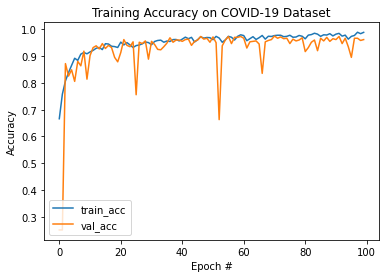

In [42]:
N = EPOCHS

plt.figure()

plt.plot(np.arange(0, N), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")
plt.title("Training Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")

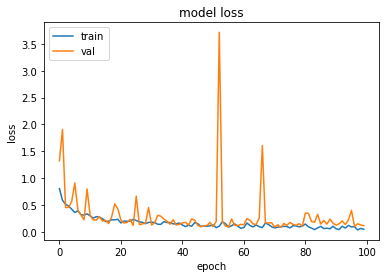

In [43]:
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [44]:
predIdxs = model.predict(testX, batch_size=BS)

# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)


# show a nicely formatted classification report
print(classification_report(testY, predIdxs,target_names=['normal','covid','virus']))

             precision    recall  f1-score   support

     normal       0.98      0.98      0.98       317
      covid       0.98      0.99      0.98       151
      virus       0.94      0.94      0.94       134

avg / total       0.97      0.97      0.97       602



In [45]:
import itertools
pred_Y = model.predict(testX, batch_size = 8, verbose = True)
pred_Y

602/602 [==============================] - 1s 2ms/step


array([[1.0000000e+00, 0.0000000e+00, 3.7782548e-14],
       [1.0000000e+00, 0.0000000e+00, 2.4073281e-22],
       [9.9999774e-01, 4.4086875e-27, 2.2355550e-06],
       ...,
       [1.3615922e-15, 1.0000000e+00, 1.6605799e-13],
       [1.0000000e+00, 5.9590121e-37, 1.3652222e-08],
       [4.0780287e-03, 6.7964640e-07, 9.9592125e-01]], dtype=float32)

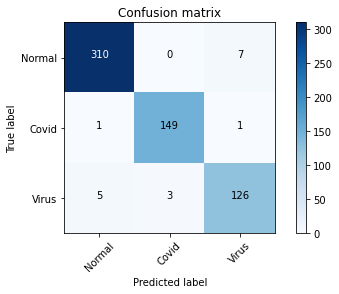

In [46]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    target_names =['Normal','Covid','Virus']

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(testX, batch_size=BS)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(pred_Y,axis = 1) 
# Convert validation observations to one hot vectors
# compute the confusion matrix
confusion_mtx = confusion_matrix(testY, Y_pred_classes)

 

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(3))